# Feature extraction

In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from scipy.spatial import distance
import numpy as np

import os

Using TensorFlow backend.


# Use model ResNet50

In [2]:
model = ResNet50(weights='imagenet', include_top=False)

# Create a list of pre -existing names of persond whose pictures will be recognised

In [3]:
name_list=['vidit' , 'ekta','ayush']
#print(name_list[1])

# Declare path for images

In [4]:
img_path='vidit.jpg'
img_path_1 = 'ekta.jpg'
img_path_2 = 'test_img_7.jpg'

# Plot picture vidit

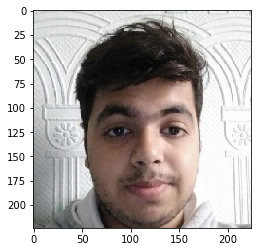

In [5]:
import matplotlib.pyplot as plt

photo_vidit = image.load_img(img_path, target_size=(224,224))
plt.imshow(photo_vidit)
plt.show()

# Plot picture ekta

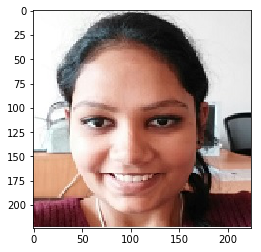

In [6]:
photo_ekta = image.load_img(img_path_1, target_size=(224,224))
plt.imshow(photo_ekta)
plt.show()

# Plot picture Ayush

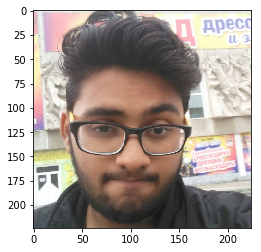

In [7]:
photo_ayush = image.load_img(img_path_2, target_size=(224,224))
plt.imshow(photo_ayush)
plt.show()

# Preprocess image -vidit

In [8]:
x_vidit= image.img_to_array(photo_vidit)
x_vidit=np.expand_dims(x_vidit,axis=0)
x_vidit=preprocess_input(x_vidit)


# preprocess image ekta

In [9]:
x_ekta = image.img_to_array(photo_ekta)
x_ekta = np.expand_dims(x_ekta , axis=0)
x_ekta= preprocess_input(x_ekta)


# Preprocess image ayush

In [10]:
x_ayush= image.img_to_array(photo_ayush)
x_ayush=np.expand_dims(x_ayush,axis=0)
x_ayush=preprocess_input(x_ayush)


# Extraction of feature vectors

# Method for feature vector extraction



In [11]:
def extract_feature_vector(feature_name):
    features=model.predict(feature_name)
    print(type(features))
    print(features.shape)
    return features

In [12]:
feature_vidit = extract_feature_vector(x_vidit)

<class 'numpy.ndarray'>
(1, 1, 1, 2048)


In [13]:
feature_ekta = extract_feature_vector(x_ekta)

<class 'numpy.ndarray'>
(1, 1, 1, 2048)


In [14]:
feature_ayush = extract_feature_vector(x_ayush)

<class 'numpy.ndarray'>
(1, 1, 1, 2048)


# save the features vector

# Definng method for saving feature vectors in a file

In [15]:
global_list_vidit=[]
global_list_ekta=[]
global_list_ayush=[]
def append_array(z , file_name , list_name) :
    temp=list_name
    temp.append(z)
    np.save(file_name+".npy" , temp)
    

def load_file(file_name) :
    return (np.load(file_name+".npy"))


   
    
#def save_feat_vector(file_name,name):
    #print(name.shape)
 #   f_handle = open(file_name+'.npy', 'wb')
  #  np.save(f_handle,name )
   # f_handle.close()
    

In [16]:
append_array( feature_vidit ,'vidit_feat_vector' , global_list_vidit)


In [17]:
append_array(feature_ekta , 'ekta_feat_vector', global_list_ekta)

In [18]:
append_array(feature_ayush, 'ayush_feat_vector',global_list_ayush)

# Load saved data

In [19]:
# Load vidit saved feature vector
load_feature_vidit = np.load('vidit_feat_vector.npy')
print(type(load_feature_vidit))
print(load_feature_vidit.shape)

<class 'numpy.ndarray'>
(1, 1, 1, 1, 2048)


In [20]:
# Load vidit saved feature vector
load_feature_ekta = np.load('ekta_feat_vector.npy')
print(type(load_feature_ekta))
print(load_feature_ekta.shape)

<class 'numpy.ndarray'>
(1, 1, 1, 1, 2048)


In [21]:
# Load vidit saved feature vector
load_feature_ayush = np.load('ayush_feat_vector.npy')
print(type(load_feature_ayush))
print(load_feature_ayush.shape)

<class 'numpy.ndarray'>
(1, 1, 1, 1, 2048)


# Calculate distance between 3 pics

In [22]:
## lets calculate distance between vidit- ekta above photos

a = distance.euclidean(load_feature_vidit.flatten(), load_feature_ekta.flatten())
print(a)

## lets calculate distance between ayush- ekta above photos

b = distance.euclidean(load_feature_ekta.flatten(), load_feature_ayush.flatten())
print(b)

## lets calculate distance between vidit- ayush above photos

c = distance.euclidean(load_feature_vidit.flatten(), load_feature_ayush.flatten())
print(c)



25.888103485107422
26.287988662719727
27.298768997192383


# Try to recognise new pic

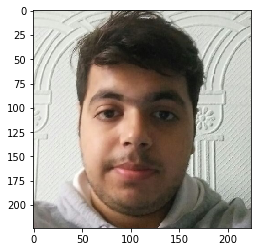

In [23]:
test_img='test_img.jpg'
photo_check = image.load_img(test_img, target_size=(224,224))
plt.imshow(photo_check)
plt.show()

In [24]:
x_check= image.img_to_array(photo_check)
x_check=np.expand_dims(x_check,axis=0)
x_check=preprocess_input(x_check)

feature_check = model.predict(x_check)

#print(feature_check)
print(type(feature_check))
print(feature_check.shape)

<class 'numpy.ndarray'>
(1, 1, 1, 2048)


In [25]:
##check the image and reccognise

## let us check whose image is this ????

pic_vidit = distance.euclidean(feature_check.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])





14.609859466552734
27.1829833984375
27.002119064331055
MIN distance is : 14.609859466552734
Picture is of : vidit


# For test_img : Right recognition
pic : vidit
recognised_pic : vidit

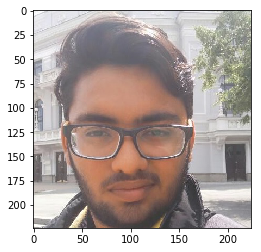

In [26]:
## trying other image

test_img_1='test_img_1.jpg'
photo_check_1 = image.load_img(test_img_1, target_size=(224,224))
plt.imshow(photo_check_1)
plt.show()

In [27]:
x_check_1= image.img_to_array(photo_check_1)
x_check_1=np.expand_dims(x_check_1,axis=0)
x_check_1=preprocess_input(x_check_1)

feature_check_1 = model.predict(x_check_1)

#print(feature_check_1)
print(type(feature_check_1))
print(feature_check_1.shape)


pic_vidit = distance.euclidean(feature_check_1.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_1.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_1.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])






<class 'numpy.ndarray'>
(1, 1, 1, 2048)
31.328100204467773
30.93392562866211
27.905498504638672
MIN distance is : 27.905498504638672
Picture is of : ayush


#  For test_img_1 : Right Recognition
pic : ayush

recognise_pic : ayush

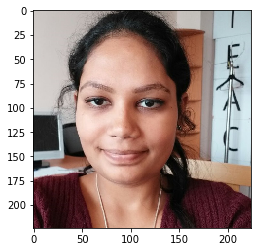

In [28]:
## Trying 3 rd image
test_img_2='test_img_2.jpg'
photo_check_2 = image.load_img(test_img_2, target_size=(224,224))
plt.imshow(photo_check_2)
plt.show()

In [29]:
x_check_2= image.img_to_array(photo_check_2)
x_check_2=np.expand_dims(x_check_2,axis=0)
x_check_2=preprocess_input(x_check_2)

feature_check_2 = model.predict(x_check_2)

#print(feature_check_2)
print(type(feature_check_2))
print(feature_check_2.shape)


pic_vidit = distance.euclidean(feature_check_2.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_2.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_2.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])





<class 'numpy.ndarray'>
(1, 1, 1, 2048)
25.34314727783203
24.187490463256836
25.787736892700195
MIN distance is : 24.187490463256836
Picture is of : ekta


# For test_img2 : Right Recognition
pic : ekta

pic_recognised : ekta

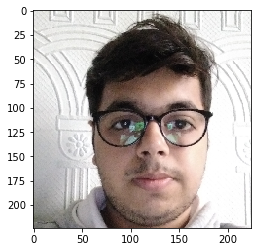

<class 'numpy.ndarray'>
(1, 1, 1, 2048)
13.895034790039062
24.760366439819336
27.298301696777344
MIN distance is : 13.895034790039062
Picture is of : vidit


In [30]:
## test_img_3

test_img_3='test_img_3.jpg'
photo_check_3 = image.load_img(test_img_3, target_size=(224,224))
plt.imshow(photo_check_3)
plt.show()

x_check_3= image.img_to_array(photo_check_3)
x_check_3=np.expand_dims(x_check_3,axis=0)
x_check_3=preprocess_input(x_check_3)

feature_check_3 = model.predict(x_check_3)

#print(feature_check_3)
print(type(feature_check_3))
print(feature_check_3.shape)


pic_vidit = distance.euclidean(feature_check_3.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_3.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_3.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])






# # For test_img3 : Right Recognition
pic : vidit

pic_recognised : vidit

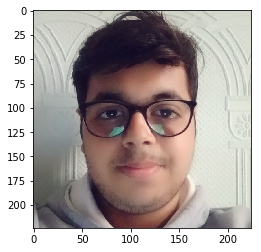

<class 'numpy.ndarray'>
(1, 1, 1, 2048)
19.82941436767578
24.075117111206055
27.875314712524414
MIN distance is : 19.82941436767578
Picture is of : vidit


In [31]:
##test_img_4

## test_img_4

test_img_4='test_img_4.jpg'
photo_check_4 = image.load_img(test_img_4, target_size=(224,224))
plt.imshow(photo_check_4)
plt.show()

x_check_4= image.img_to_array(photo_check_4)
x_check_4=np.expand_dims(x_check_4,axis=0)
x_check_4=preprocess_input(x_check_4)

feature_check_4 = model.predict(x_check_4)

#print(feature_check_4)
print(type(feature_check_4))
print(feature_check_4.shape)


pic_vidit = distance.euclidean(feature_check_4.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_4.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_4.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])







#  For test_img4 : Right Recognition
pic : vidit


pic_recognised : vidit

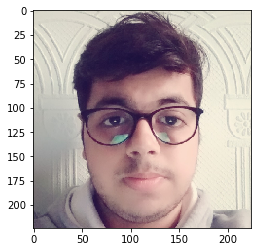

<class 'numpy.ndarray'>
(1, 1, 1, 2048)
17.302684783935547
23.834712982177734
26.538284301757812
MIN distance is : 17.302684783935547
Picture is of : vidit


In [32]:
## test_img_5

test_img_5='test_img_5.jpg'
photo_check_5 = image.load_img(test_img_5, target_size=(224,224))
plt.imshow(photo_check_5)
plt.show()

x_check_5= image.img_to_array(photo_check_5)
x_check_5=np.expand_dims(x_check_5,axis=0)
x_check_5=preprocess_input(x_check_5)

feature_check_5 = model.predict(x_check_5)

#print(feature_check_5)
print(type(feature_check_5))
print(feature_check_5.shape)


pic_vidit = distance.euclidean(feature_check_5.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_5.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_5.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])







#   For test_img5 : Right Recognition
pic : vidit

pic_recognised : vidit

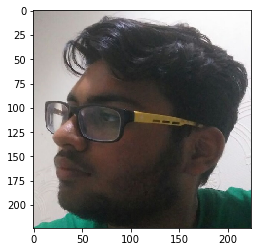

<class 'numpy.ndarray'>
(1, 1, 1, 2048)
29.522024154663086
29.41856575012207
27.721216201782227
MIN distance is : 27.721216201782227
Picture is of : ayush


In [33]:
#test_img_6

test_img_6='validation_pics/ayush_left.jpg'
photo_check_6 = image.load_img(test_img_6, target_size=(224,224))
plt.imshow(photo_check_6)
plt.show()

x_check_6= image.img_to_array(photo_check_6)
x_check_6=np.expand_dims(x_check_6,axis=0)
x_check_6=preprocess_input(x_check_6)

feature_check_6 = model.predict(x_check_6)

#print(feature_check_6)
print(type(feature_check_6))
print(feature_check_6.shape)


pic_vidit = distance.euclidean(feature_check_6.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_6.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_6.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])








# for test_img6 : Right recognition
pic : ayush

recognise_pic : ayush

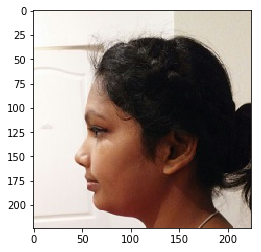

<class 'numpy.ndarray'>
(1, 1, 1, 2048)
26.715145111083984
30.773542404174805
30.712244033813477
MIN distance is : 26.715145111083984
Picture is of : vidit


In [34]:
#test_img_7

test_img_7='validation_pics/ekta_left.jpg'
photo_check_7 = image.load_img(test_img_7, target_size=(224,224))
plt.imshow(photo_check_7)
plt.show()

x_check_7= image.img_to_array(photo_check_7)
x_check_7=np.expand_dims(x_check_7,axis=0)
x_check_7=preprocess_input(x_check_7)

feature_check_7 = model.predict(x_check_7)

#print(feature_check_7)
print(type(feature_check_7))
print(feature_check_7.shape)


pic_vidit = distance.euclidean(feature_check_7.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_7.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_7.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])








# for test_img7 : Wrong recognition
pic : ekta

recognise_pic : vidit

# Accuracy : Right - 7/8


# Wrong - 1/8

# Now appending more feature vectors to the file of each person

# Adding features of vidit

In [35]:

append_array(feature_check, "vidit_feat_vector" ,global_list_vidit)


In [36]:
demo = load_file("vidit_feat_vector")
print((demo.shape))

(2, 1, 1, 1, 2048)


In [37]:

append_array(feature_check_3, "vidit_feat_vector" ,global_list_vidit)

In [38]:

append_array(feature_check_4, "vidit_feat_vector" ,global_list_vidit)

In [39]:

append_array(feature_check_5, "vidit_feat_vector" ,global_list_vidit)

In [40]:
vidit_file = load_file("vidit_feat_vector")
print(vidit_file[4].shape)

(1, 1, 1, 2048)


# Adding features of Ekta

In [41]:
append_array(feature_check_2, "ekta_feat_vector" ,global_list_ekta)

In [42]:
append_array(feature_check_7, "ekta_feat_vector" ,global_list_ekta)

In [43]:
ekta_file = load_file("ekta_feat_vector")
print(ekta_file.shape[0])

3


# Adding features of Ayush

In [44]:
append_array(feature_check_1, "ayush_feat_vector" ,global_list_ayush)

In [45]:
append_array(feature_check_6, "ayush_feat_vector" ,global_list_ayush)

In [78]:
#ayush_file = load_file("ayush_feat_vector")
#print(ayush_file.shape[0])

# Enhanced Version of the Program :: 

# Again take the picture whose recognition has been wrong 


# let us define a function for checking and finding minimum distance to recognise the images

In [79]:
#lET US CALC DISTANCE WITH EACH  FEATURE VECTOR file
min_dist_list=[]
def calc_distance_vidit (feature_check) :
    dist_list=[]
    vidit_file = load_file("vidit_feat_vector")
    number_of_feature_vector = vidit_file.shape[0]
    for i in range(number_of_feature_vector) :
        temp=vidit_file[i]
        dist= distance.euclidean(vidit_file[i].flatten() , feature_check.flatten())
        dist_list.append(dist)
    min_dist_list.append(min(dist_list))
    
def calc_distance_ekta (feature_check) :
    dist_list=[]
    ekta_file = load_file("ekta_feat_vector")
    number_of_feature_vector = ekta_file.shape[0]
    for i in range(number_of_feature_vector) :
        temp=ekta_file[i]
        dist= distance.euclidean(ekta_file[i].flatten() , feature_check.flatten())
        dist_list.append(dist)
    min_dist_list.append(min(dist_list))

def calc_distance_ayush (feature_check) :
    dist_list=[]
    ayush_file = load_file("ayush_feat_vector")
    number_of_feature_vector = ayush_file.shape[0]
    for i in range(number_of_feature_vector) :
        temp=ayush_file[i]
        dist= distance.euclidean(ayush_file[i].flatten() , feature_check.flatten())
        dist_list.append(dist)
    min_dist_list.append(min(dist_list))
    


    

In [49]:

#list_dist=[pic_vidit , pic_ekta, pic_ayush]
#print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
#name = list_dist.index(min(list_dist))
#print("Picture is of :", name_list[name])

calc_distance_vidit(feature_check_7)
calc_distance_ekta(feature_check_7)
calc_distance_ayush(feature_check_7)


In [50]:
print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])

MIN distance is : 0.0
Picture is of : ekta


# Right Recognised

pic : ekta

Recognised pic : ekta

# test_img8 recognition

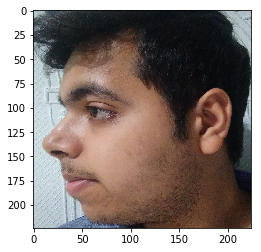

In [51]:
test_img_8='validation_pics/vidit_left.jpg'
photo_check_8 = image.load_img(test_img_8, target_size=(224,224))
plt.imshow(photo_check_8)
plt.show()

In [52]:
x_check_8= image.img_to_array(photo_check_8)
x_check_8=np.expand_dims(x_check_8,axis=0)
x_check_8=preprocess_input(x_check_8)

feature_check_8 = model.predict(x_check_8)
min_dist_list=[]

calc_distance_vidit(feature_check_8)
calc_distance_ekta(feature_check_8)
calc_distance_ayush(feature_check_8)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])



MIN distance is : 24.68815803527832
Picture is of : ayush


# test_img 8 : Wrong Recognition

pic : vidit

recognised pic : ayush

In [54]:

append_array(feature_check_8, "vidit_feat_vector" ,global_list_vidit)


# test_img 9 Recognition 

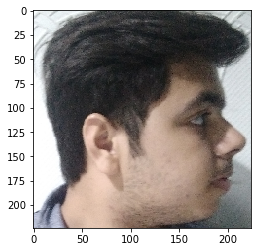

In [55]:
#picture vidit
test_img_9='validation_pics/vidit_right.jpg'
photo_check_9 = image.load_img(test_img_9, target_size=(224,224))
plt.imshow(photo_check_9)
plt.show()

In [56]:
x_check_9= image.img_to_array(photo_check_9)
x_check_9=np.expand_dims(x_check_9,axis=0)
x_check_9=preprocess_input(x_check_9)

feature_check_9 = model.predict(x_check_9)
min_dist_list=[]

calc_distance_vidit(feature_check_9)
calc_distance_ekta(feature_check_9)
calc_distance_ayush(feature_check_9)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])



MIN distance is : 26.598417282104492
Picture is of : ayush


In [57]:
#wrong recognition
append_array(feature_check_9, "vidit_feat_vector" ,global_list_vidit)


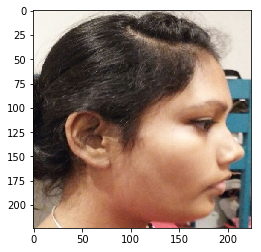

In [58]:
#adding to the features vector 

test_img_10='validation_pics/ekta_right.jpg'
photo_check_10 = image.load_img(test_img_10, target_size=(224,224))
plt.imshow(photo_check_10)
plt.show()

x_check_10= image.img_to_array(photo_check_10)
x_check_10=np.expand_dims(x_check_10,axis=0)
x_check_10=preprocess_input(x_check_10)

feature_check_10 = model.predict(x_check_10)

append_array(feature_check_10, "ekta_feat_vector" ,global_list_ekta)




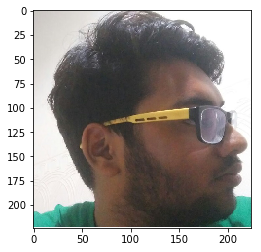

In [59]:
#adding to the features vector 

test_img_11='validation_pics/ayush_right.jpg'
photo_check_11 = image.load_img(test_img_11, target_size=(224,224))
plt.imshow(photo_check_11)
plt.show()

x_check_11= image.img_to_array(photo_check_11)
x_check_11=np.expand_dims(x_check_11,axis=0)
x_check_11=preprocess_input(x_check_11)

feature_check_11 = model.predict(x_check_11)

append_array(feature_check_11, "ayush_feat_vector" ,global_list_ayush)




# We have adopt a algo : Check image if it is wrong recog then add its feat vector to file . So that we can measure both right and wrong recognised images

# Again Recognising Pics

# pic 1

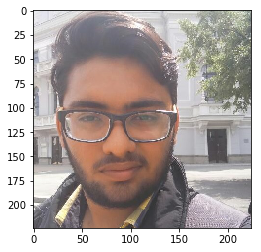

MIN distance is : 13.311777114868164
Picture is of : ayush


In [60]:
_img_1='final_pics/pic_1.jpg'
pic_check = image.load_img(_img_1, target_size=(224,224))
plt.imshow(pic_check)
plt.show()

_check_= image.img_to_array(pic_check)
_check_=np.expand_dims(_check_,axis=0)
_check_=preprocess_input(_check_)

feature_check__1 = model.predict(_check_)
min_dist_list=[]

calc_distance_vidit(feature_check__1)
calc_distance_ekta(feature_check__1)
calc_distance_ayush(feature_check__1)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])


append_array(feature_check__1, "ayush_feat_vector" ,global_list_ayush)


# Right 
pic : ayush

recognised : ayush

# Pic : 2

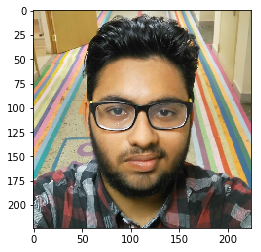

MIN distance is : 25.667919158935547
Picture is of : ayush


In [61]:
_img_1='final_pics/pic_2.jpg'
pic_check = image.load_img(_img_1, target_size=(224,224))
plt.imshow(pic_check)
plt.show()

_check_= image.img_to_array(pic_check)
_check_=np.expand_dims(_check_,axis=0)
_check_=preprocess_input(_check_)

feature_check__2 = model.predict(_check_)
min_dist_list=[]

calc_distance_vidit(feature_check__2)
calc_distance_ekta(feature_check__2)
calc_distance_ayush(feature_check__2)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])


append_array(feature_check__2, "ayush_feat_vector" ,global_list_ayush)


# Right 
pic : ayush

recognised_pic : ayush

# Pic 3

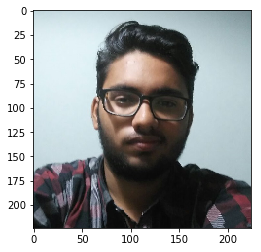

MIN distance is : 0.0
Picture is of : ayush


In [80]:
_img_3='final_pics/pic_3.jpg'
pic_check_3 = image.load_img(_img_3, target_size=(224,224))
plt.imshow(pic_check_3)
plt.show()

_check_3= image.img_to_array(pic_check_3)
_check_3=np.expand_dims(_check_3,axis=0)
_check_3=preprocess_input(_check_3)

feature_check__3 = model.predict(_check_3)

append_array(feature_check__3, "ayush_feat_vector" ,global_list_ayush)

min_dist_list=[]

calc_distance_vidit(feature_check__3)
calc_distance_ekta(feature_check__3)
calc_distance_ayush(feature_check__3)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])






# Right 
pic ; ayush

recognised pic : ayush

In [81]:
d = np.load("ayush_feat_vector.npy")
print(d.shape)

(13, 1, 1, 1, 2048)


In [82]:
print(d[10])
print(feature_check__3)

[[[[ 0.          0.20808089  0.         ...,  0.57784468  0.          0.0233505 ]]]]
[[[[ 0.          0.20808089  0.         ...,  0.57784468  0.          0.0233505 ]]]]


# Pic 4

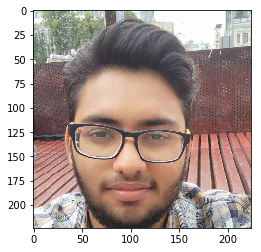

MIN distance is : 24.341856002807617
Picture is of : ayush


In [83]:
_img_4='final_pics/pic_4.jpg'
pic_check_4 = image.load_img(_img_4, target_size=(224,224))
plt.imshow(pic_check_4)
plt.show()

_check_4= image.img_to_array(pic_check_4)
_check_4=np.expand_dims(_check_4,axis=0)
_check_4=preprocess_input(_check_4)

feature_check__4 = model.predict(_check_4)


min_dist_list=[]

calc_distance_vidit(feature_check__4)
calc_distance_ekta(feature_check__4)
calc_distance_ayush(feature_check__4)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])






In [84]:
append_array(feature_check__4, "ayush_feat_vector" ,global_list_ayush)


# Right 
pic : ayush

recognised_pic : ayush

# Pic 5

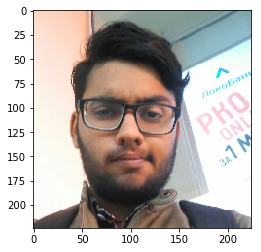

MIN distance is : 21.90606689453125
Picture is of : ayush


In [85]:
_img_5='final_pics/pic_5.jpg'
pic_check_5 = image.load_img(_img_5, target_size=(224,224))
plt.imshow(pic_check_5)
plt.show()

_check_5= image.img_to_array(pic_check_5)
_check_5=np.expand_dims(_check_5,axis=0)
_check_5=preprocess_input(_check_5)

feature_check__5 = model.predict(_check_5)


min_dist_list=[]

calc_distance_vidit(feature_check__5)
calc_distance_ekta(feature_check__5)
calc_distance_ayush(feature_check__5)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])






In [86]:
append_array(feature_check__5, "ayush_feat_vector" ,global_list_ayush)



# Right


# Pic 6

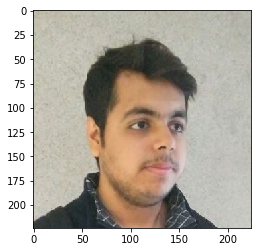

MIN distance is : 23.000469207763672
Picture is of : ayush


In [87]:
_img_6='final_pics/pic_6.jpg'
pic_check_6 = image.load_img(_img_6, target_size=(224,224))
plt.imshow(pic_check_6)
plt.show()

_check_6= image.img_to_array(pic_check_6)
_check_6=np.expand_dims(_check_6,axis=0)
_check_6=preprocess_input(_check_6)

feature_check__6 = model.predict(_check_6)


min_dist_list=[]

calc_distance_vidit(feature_check__6)
calc_distance_ekta(feature_check__6)
calc_distance_ayush(feature_check__6)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])






In [88]:
append_array(feature_check__6, "vidit_feat_vector" ,global_list_vidit)


# Wrong

# Pic 7

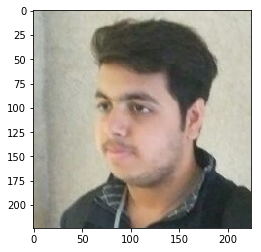

MIN distance is : 15.663252830505371
Picture is of : vidit


In [89]:
_img_7='final_pics/pic_7.jpg'
pic_check_7 = image.load_img(_img_7, target_size=(224,224))
plt.imshow(pic_check_7)
plt.show()

_check_7= image.img_to_array(pic_check_7)
_check_7=np.expand_dims(_check_7,axis=0)
_check_7=preprocess_input(_check_7)

feature_check__7 = model.predict(_check_7)


min_dist_list=[]

calc_distance_vidit(feature_check__7)
calc_distance_ekta(feature_check__7)
calc_distance_ayush(feature_check__7)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])






In [90]:
append_array(feature_check__7, "vidit_feat_vector" ,global_list_vidit)


# Right
pic : vidit

recognised_pic : vidit

# Pic 8

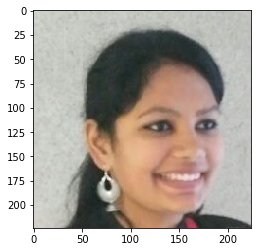

MIN distance is : 14.824161529541016
Picture is of : vidit


In [91]:
_img_8='final_pics/pic_8.jpg'
pic_check_8 = image.load_img(_img_8, target_size=(224,224))
plt.imshow(pic_check_8)
plt.show()

_check_8= image.img_to_array(pic_check_8)
_check_8=np.expand_dims(_check_8,axis=0)
_check_8=preprocess_input(_check_8)

feature_check__8 = model.predict(_check_8)


min_dist_list=[]

calc_distance_vidit(feature_check__8)
calc_distance_ekta(feature_check__8)
calc_distance_ayush(feature_check__8)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])



In [92]:

append_array(feature_check__8, "ekta_feat_vector" ,global_list_ekta)


# Wrong 
pic : ekta

recognised_pic : vidit

# Pic 9

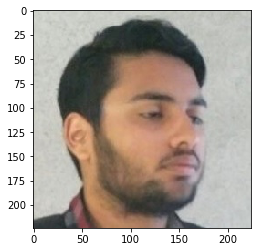

MIN distance is : 18.050329208374023
Picture is of : vidit


In [93]:
_img_9='final_pics/pic_9.jpg'
pic_check_9 = image.load_img(_img_9, target_size=(224,224))
plt.imshow(pic_check_9)
plt.show()

_check_9= image.img_to_array(pic_check_9)
_check_9=np.expand_dims(_check_9,axis=0)
_check_9=preprocess_input(_check_9)

feature_check__9 = model.predict(_check_9)


min_dist_list=[]

calc_distance_vidit(feature_check__9)
calc_distance_ekta(feature_check__9)
calc_distance_ayush(feature_check__9)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])




In [94]:

append_array(feature_check__9, "ayush_feat_vector" ,global_list_ayush)


# wrong
pic : ayush

recognised : vidit

# Pic 10

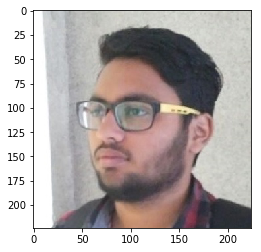

MIN distance is : 17.402801513671875
Picture is of : ayush


In [95]:
_img_10='final_pics/pic_10.jpg'
pic_check_10 = image.load_img(_img_10, target_size=(224,224))
plt.imshow(pic_check_10)
plt.show()

_check_10= image.img_to_array(pic_check_10)
_check_10=np.expand_dims(_check_10,axis=0)
_check_10=preprocess_input(_check_10)

feature_check__10 = model.predict(_check_10)


min_dist_list=[]

calc_distance_vidit(feature_check__10)
calc_distance_ekta(feature_check__10)
calc_distance_ayush(feature_check__10)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])




In [96]:

append_array(feature_check__10, "ayush_feat_vector" ,global_list_ayush)


# Right

# Pic 11

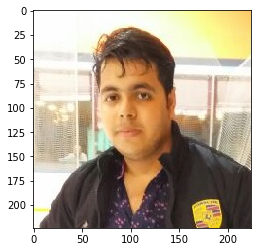

MIN distance is : 25.347183227539062
Picture is of : ayush


In [97]:
_img_11='final_pics/pic_11.jpg'
pic_check_11 = image.load_img(_img_11, target_size=(224,224))
plt.imshow(pic_check_11)
plt.show()

_check_11= image.img_to_array(pic_check_11)
_check_11=np.expand_dims(_check_11,axis=0)
_check_11=preprocess_input(_check_11)

feature_check__11 = model.predict(_check_11)


min_dist_list=[]

calc_distance_vidit(feature_check__11)
calc_distance_ekta(feature_check__11)
calc_distance_ayush(feature_check__11)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])


In [98]:

append_array(feature_check__11, "vidit_feat_vector" ,global_list_vidit)


# Wrong 
pic : vidit

recognides : ayush

# Pic 12

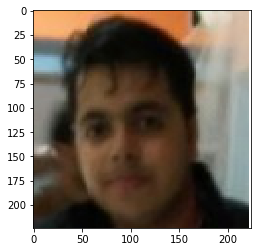

MIN distance is : 0.0
Picture is of : vidit


In [128]:
_img_12='final_pics/pic_12.jpg'
pic_check_12 = image.load_img(_img_12, target_size=(224,224))
plt.imshow(pic_check_12)
plt.show()

_check_12= image.img_to_array(pic_check_12)
_check_12=np.expand_dims(_check_12,axis=0)
_check_12=preprocess_input(_check_12)

feature_check__12 = model.predict(_check_12)


min_dist_list=[]

calc_distance_vidit(feature_check__12)
calc_distance_ekta(feature_check__12)
calc_distance_ayush(feature_check__12)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])




In [100]:

append_array(feature_check__12, "vidit_feat_vector" ,global_list_vidit)


# Wrong
pic : vidit

recognised : ekta

# Pic 13

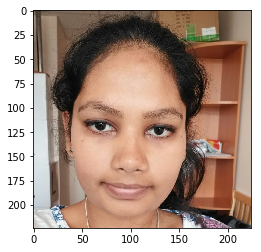

MIN distance is : 21.728883743286133
Picture is of : ekta


In [101]:
_img_13='final_pics/pic_13.jpg'
pic_check_13 = image.load_img(_img_13, target_size=(224,224))
plt.imshow(pic_check_13)
plt.show()

_check_13= image.img_to_array(pic_check_13)
_check_13=np.expand_dims(_check_13,axis=0)
_check_13=preprocess_input(_check_13)

feature_check__13 = model.predict(_check_13)


min_dist_list=[]

calc_distance_vidit(feature_check__13)
calc_distance_ekta(feature_check__13)
calc_distance_ayush(feature_check__13)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])



In [102]:

append_array(feature_check__13, "ekta_feat_vector" ,global_list_ekta)


# Right

# Pic 14

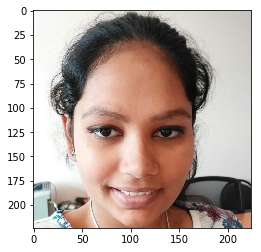

MIN distance is : 22.38167953491211
Picture is of : ekta


In [103]:
_img_14='final_pics/pic_14.jpg'
pic_check_14 = image.load_img(_img_14, target_size=(224,224))
plt.imshow(pic_check_14)
plt.show()

_check_14= image.img_to_array(pic_check_14)
_check_14=np.expand_dims(_check_14,axis=0)
_check_14=preprocess_input(_check_14)

feature_check__14 = model.predict(_check_14)


min_dist_list=[]

calc_distance_vidit(feature_check__14)
calc_distance_ekta(feature_check__14)
calc_distance_ayush(feature_check__14)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])


In [104]:

append_array(feature_check__14, "ekta_feat_vector" ,global_list_ekta)


# Right

# Pic 15

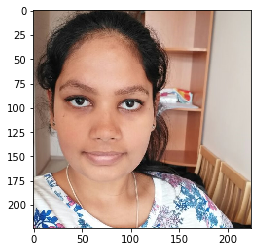

MIN distance is : 0.0
Picture is of : ekta


In [107]:
_img_15='final_pics/pic_15.jpg'
pic_check_15 = image.load_img(_img_15, target_size=(224,224))
plt.imshow(pic_check_15)
plt.show()

_check_15= image.img_to_array(pic_check_15)
_check_15=np.expand_dims(_check_15,axis=0)
_check_15=preprocess_input(_check_15)

feature_check__15 = model.predict(_check_15)


min_dist_list=[]

calc_distance_vidit(feature_check__15)
calc_distance_ekta(feature_check__15)
calc_distance_ayush(feature_check__15)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])


In [106]:

append_array(feature_check__15, "ekta_feat_vector" ,global_list_ekta)


# Right 

pic : ekta

recognised _pic : ekta

# Pic 16

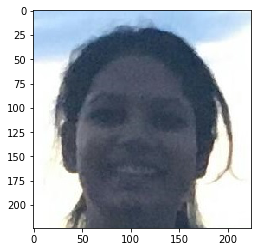

MIN distance is : 21.845617294311523
Picture is of : ayush


In [108]:
_img_16='final_pics/pic_16.jpg'
pic_check_16 = image.load_img(_img_16, target_size=(224,224))
plt.imshow(pic_check_16)
plt.show()

_check_16= image.img_to_array(pic_check_16)
_check_16=np.expand_dims(_check_16,axis=0)
_check_16=preprocess_input(_check_16)

feature_check__16 = model.predict(_check_16)


min_dist_list=[]

calc_distance_vidit(feature_check__16)
calc_distance_ekta(feature_check__16)
calc_distance_ayush(feature_check__16)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])


# Wrong
pic : ekta

recognised_pic : ayush


In [109]:

append_array(feature_check__16, "ekta_feat_vector" ,global_list_ekta)


# Pic 17

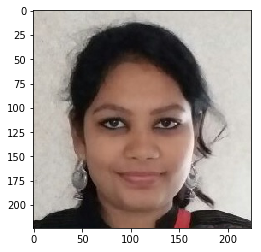

MIN distance is : 14.79892635345459
Picture is of : ekta


In [110]:
_img_17='final_pics/pic_17.jpg'
pic_check_17 = image.load_img(_img_17, target_size=(224,224))
plt.imshow(pic_check_17)
plt.show()

_check_17= image.img_to_array(pic_check_17)
_check_17=np.expand_dims(_check_17,axis=0)
_check_17=preprocess_input(_check_17)

feature_check__17 = model.predict(_check_17)


min_dist_list=[]

calc_distance_vidit(feature_check__17)
calc_distance_ekta(feature_check__17)
calc_distance_ayush(feature_check__17)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])



In [111]:
append_array(feature_check__17, "ekta_feat_vector" ,global_list_ekta)


# Right


# Pic 18

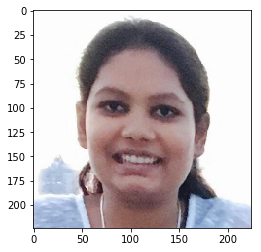

MIN distance is : 21.166643142700195
Picture is of : ekta


In [113]:
_img_18='final_pics/pic_18.png'
pic_check_18 = image.load_img(_img_18, target_size=(224,224))
plt.imshow(pic_check_18)
plt.show()

_check_18= image.img_to_array(pic_check_18)
_check_18=np.expand_dims(_check_18,axis=0)
_check_18=preprocess_input(_check_18)

feature_check__18 = model.predict(_check_18)


min_dist_list=[]

calc_distance_vidit(feature_check__18)
calc_distance_ekta(feature_check__18)
calc_distance_ayush(feature_check__18)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])



In [114]:
append_array(feature_check__18, "ekta_feat_vector" ,global_list_ekta)


# Right

# Pic 19

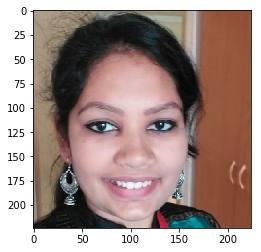

MIN distance is : 21.084487915039062
Picture is of : ekta


In [116]:
_img_19='final_pics/pic_19.jpg'
pic_check_19 = image.load_img(_img_19, target_size=(224,224))
plt.imshow(pic_check_19)
plt.show()

_check_19= image.img_to_array(pic_check_19)
_check_19=np.expand_dims(_check_19,axis=0)
_check_19=preprocess_input(_check_19)

feature_check__19 = model.predict(_check_19)


min_dist_list=[]

calc_distance_vidit(feature_check__19)
calc_distance_ekta(feature_check__19)
calc_distance_ayush(feature_check__19)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])



In [117]:
append_array(feature_check__19, "ekta_feat_vector" ,global_list_ekta)


# Right

# Pic 20

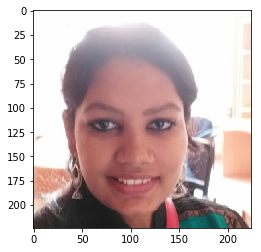

MIN distance is : 20.312471389770508
Picture is of : ekta


In [118]:
_img_20='final_pics/pic_20.jpg'
pic_check_20 = image.load_img(_img_20, target_size=(224,224))
plt.imshow(pic_check_20)
plt.show()

_check_20= image.img_to_array(pic_check_20)
_check_20=np.expand_dims(_check_20,axis=0)
_check_20=preprocess_input(_check_20)

feature_check__20 = model.predict(_check_20)


min_dist_list=[]

calc_distance_vidit(feature_check__20)
calc_distance_ekta(feature_check__20)
calc_distance_ayush(feature_check__20)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])



# Right

In [120]:
append_array(feature_check__20, "ekta_feat_vector" ,global_list_ekta)


# Pic 21

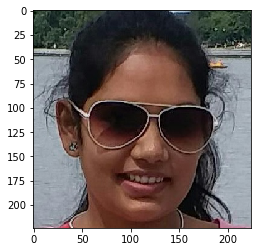

MIN distance is : 26.343965530395508
Picture is of : ekta


In [121]:
_img_21='final_pics/pic_21.jpg'
pic_check_21 = image.load_img(_img_21, target_size=(224,224))
plt.imshow(pic_check_21)
plt.show()

_check_21= image.img_to_array(pic_check_21)
_check_21=np.expand_dims(_check_21,axis=0)
_check_21=preprocess_input(_check_21)

feature_check__21 = model.predict(_check_21)


min_dist_list=[]

calc_distance_vidit(feature_check__21)
calc_distance_ekta(feature_check__21)
calc_distance_ayush(feature_check__21)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])



In [122]:
append_array(feature_check__21, "ekta_feat_vector" ,global_list_ekta)


# Right

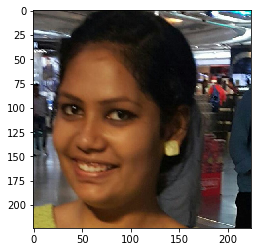

MIN distance is : 0.0
Picture is of : ekta


In [125]:
_img_22='final_pics/pic_22.jpg'
pic_check_22 = image.load_img(_img_22, target_size=(224,224))
plt.imshow(pic_check_22)
plt.show()

_check_22= image.img_to_array(pic_check_22)
_check_22=np.expand_dims(_check_22,axis=0)
_check_22=preprocess_input(_check_22)

feature_check__22 = model.predict(_check_22)


min_dist_list=[]

calc_distance_vidit(feature_check__22)
calc_distance_ekta(feature_check__22)
calc_distance_ayush(feature_check__22)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])



In [124]:
append_array(feature_check__22, "ekta_feat_vector" ,global_list_ekta)


# Right


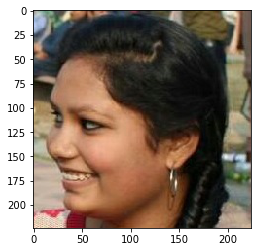

MIN distance is : 22.72178077697754
Picture is of : ekta


In [126]:
_img_23='final_pics/pic_23.jpg'
pic_check_23 = image.load_img(_img_23, target_size=(224,224))
plt.imshow(pic_check_23)
plt.show()

_check_23= image.img_to_array(pic_check_23)
_check_23=np.expand_dims(_check_23,axis=0)
_check_23=preprocess_input(_check_23)

feature_check__23 = model.predict(_check_23)


min_dist_list=[]

calc_distance_vidit(feature_check__23)
calc_distance_ekta(feature_check__23)
calc_distance_ayush(feature_check__23)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])



In [127]:
append_array(feature_check__23, "ekta_feat_vector" ,global_list_ekta)


# Right

# Pic 24

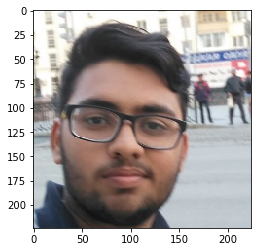

MIN distance is : 23.025341033935547
Picture is of : ayush


In [131]:
_img_24='final_pics/pic_24.jpg'
pic_check_24 = image.load_img(_img_24, target_size=(224,224))
plt.imshow(pic_check_24)
plt.show()

_check_24= image.img_to_array(pic_check_24)
_check_24=np.expand_dims(_check_24,axis=0)
_check_24=preprocess_input(_check_24)

feature_check__24 = model.predict(_check_24)


min_dist_list=[]

calc_distance_vidit(feature_check__24)
calc_distance_ekta(feature_check__24)
calc_distance_ayush(feature_check__24)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])



# Right

In [132]:
append_array(feature_check__24, "ayush_feat_vector" ,global_list_ayush)


# Pic 25

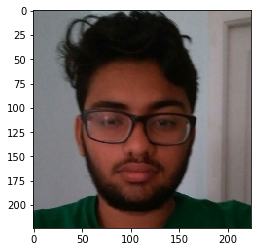

MIN distance is : 20.2744140625
Picture is of : ayush


In [133]:
_img_25='final_pics/pic_25.jpg'
pic_check_25 = image.load_img(_img_25, target_size=(224,224))
plt.imshow(pic_check_25)
plt.show()

_check_25= image.img_to_array(pic_check_25)
_check_25=np.expand_dims(_check_25,axis=0)
_check_25=preprocess_input(_check_25)

feature_check__25 = model.predict(_check_25)


min_dist_list=[]

calc_distance_vidit(feature_check__25)
calc_distance_ekta(feature_check__25)
calc_distance_ayush(feature_check__25)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])



In [134]:
append_array(feature_check__25, "ayush_feat_vector" ,global_list_ayush)


In [135]:
d = np.load("ayush_feat_vector.npy")
print(d.shape)

(19, 1, 1, 1, 2048)


In [136]:
print(d)

[[[[[  0.00000000e+00   6.93989545e-02   2.94924323e-02 ...,
       5.27647853e-01   1.80202931e-01   3.10813248e-01]]]]



 [[[[  8.95081535e-02   8.73676479e-01   4.39653881e-02 ...,
       2.16904894e-01   5.18861972e-02   2.94385463e-01]]]]



 [[[[  2.46649146e-01   2.06471577e-01   5.25386214e-01 ...,
       3.20386231e-01   4.35537222e-04   3.16376269e-01]]]]



 ..., 
 [[[[  8.70539807e-03   2.75686353e-01   1.12208754e-01 ...,
       1.70856431e-01   0.00000000e+00   2.78515279e-01]]]]



 [[[[  0.00000000e+00   7.34687671e-02   0.00000000e+00 ...,
       3.67163360e-01   0.00000000e+00   1.22750796e-01]]]]



 [[[[  3.20353717e-01   0.00000000e+00   2.71413952e-01 ...,
       3.80624652e-01   1.09664546e-02   0.00000000e+00]]]]]


In [137]:
d = np.load("vidit_feat_vector.npy")
print(d.shape)

(12, 1, 1, 1, 2048)


In [138]:
d = np.load("ekta_feat_vector.npy")
print(d.shape)

(17, 1, 1, 1, 2048)


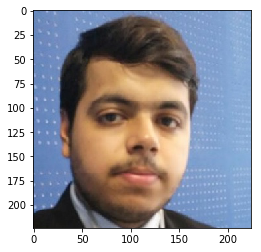

MIN distance is : 23.298627853393555
Picture is of : vidit


In [140]:
_img_26='final_pics/final_test.jpg'
pic_check_26 = image.load_img(_img_26, target_size=(224,224))
plt.imshow(pic_check_26)
plt.show()

_check_26= image.img_to_array(pic_check_26)
_check_26=np.expand_dims(_check_26,axis=0)
_check_26=preprocess_input(_check_26)

feature_check__26 = model.predict(_check_26)


min_dist_list=[]

calc_distance_vidit(feature_check__26)
calc_distance_ekta(feature_check__26)
calc_distance_ayush(feature_check__26)


print("MIN distance is :" ,min(min_dist_list) )
name = min_dist_list.index(min(min_dist_list))
print("Picture is of :", name_list[name])

